In [1]:
from visual_behavior.visualization.qc import session_plots as sp
from visual_behavior.visualization.qc import container_plots as cp
from visual_behavior.visualization.qc import data_loading as dl
import visual_behavior.utilities as vbu

from visual_behavior.translator.foraging2 import data_to_change_detection_core
from visual_behavior.translator.core import create_extended_dataframe
from visual_behavior.change_detection.trials import summarize
import visual_behavior.database as db

import plotly.graph_objects as go
import plotly.express as px

import xarray as xr

%matplotlib inline
%widescreen
%standard_imports

/home/dougo/.local/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


imported:
	os
	pandas as pd
	numpy as np
	matplotlib.pyplot as plt


In [11]:
def get_filepath(osid,file_type):
    well_known_files = db.get_well_known_files(osid).set_index('name')
    behavior_video_path = ''.join(well_known_files.loc[file_type][[
                                  'storage_directory', 'filename']].tolist())
    return behavior_video_path

In [40]:
vb = db.Database('visual_behavior_data')

In [3]:
ophys_experiment_id = 775614751
ophys_session_id = db.convert_id({'ophys_experiment_id':ophys_experiment_id},'ophys_session_id')
uuid = db.convert_id({'ophys_experiment_id':ophys_experiment_id},'behavior_session_uuid')
print(ophys_experiment_id, ophys_session_id, uuid)

775614751 775289198 7da1aebf-fad4-4013-a991-18a13d1a8b94


In [10]:
pkl_path = db.get_pkl_path(ophys_session_id,id_type='ophys_session_id')
pkl_path

pkl path  = /allen/programs/braintv/production/visualbehavior/prod0/specimen_722884882/behavior_session_775378326/775289198.pkl


'/allen/programs/braintv/production/visualbehavior/prod0/specimen_722884882/behavior_session_775378326/775289198.pkl'

In [13]:
movie_path = get_filepath(ophys_session_id,'RawBehaviorTrackingVideo')
movie_path

'/allen/programs/braintv/production/visualbehavior/prod0/specimen_722884882/ophys_session_775289198/775289198_video-0.avi'

In [14]:
pkl_path = get_filepath(ophys_session_id,'StimulusPickle')
pkl_path

'/allen/programs/braintv/production/visualbehavior/prod0/specimen_722884882/behavior_session_775378326/775289198.pkl'

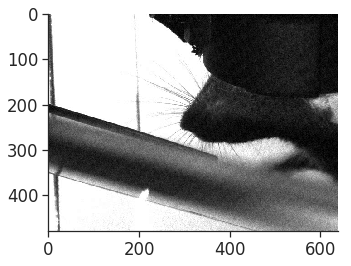

In [35]:
movie = vbu.Movie(movie_path)
fig,ax=plt.subplots()
ax.imshow(movie.get_frame(12300))

In [36]:
data = pd.read_pickle(pkl_path)
    
core_data = data_to_change_detection_core(data)

In [37]:
core_data['licks']

,frame,time
0,249,4.153476
1,259,4.320218
2,270,4.503680
3,278,4.637142
4,287,4.787267
...,...,...
5268,283588,4730.507982
5269,286914,4785.987439
5270,286929,4786.237623
5271,287181,4790.441109


In [38]:
trials = create_extended_dataframe(**core_data).drop(columns=['date', 'LDT_mode'])
summary = summarize.session_level_summary(trials).iloc[0].to_dict()

In [39]:
summary

{'mouse_id': '403491',
 'behavior_session_uuid': UUID('7da1aebf-fad4-4013-a991-18a13d1a8b94'),
 'startdatetime': Timestamp('2018-11-08 11:22:06.936000-0800', tz='tzoffset(None, -28800)'),
 'session_duration': 3593.4077284647865,
 'd_prime_peak': nan,
 'discrim_p': 0.8398822850603558,
 'response_bias': 0.8717948717948718,
 'flashwise_lick_probability': 0.29809550096605025,
 'earned_water': 0.203,
 'total_water': 0.203,
 'num_contingent_trials': 39,
 'lick_latency_median': 0.4002853433485143,
 'fraction_time_aborted': 0.9113092281090072,
 'fraction_time_hit': 0.0656899986096539,
 'fraction_time_miss': 0.01234722586789854,
 'fraction_time_correct_reject': 0.0,
 'fraction_time_false_alarm': 0.010653547413440313,
 'fraction_time_auto_rewarded': 0.0,
 'number_of_hit_trials': 29,
 'number_of_miss_trials': 5,
 'number_of_false_alarm_trials': 5,
 'number_of_correct_reject_trials': 0.0,
 'hit_rate_peak': nan,
 'false_alarm_rate_peak': nan,
 'number_of_licks': 4874,
 'blank_duration': 0.5,
 'day_

In [41]:
vb.behavior_data['summary'].find_one({'behavior_session_uuid':uuid})

{'_id': ObjectId('5d5e3c048bf2db9c32f61c13'),
 'mouse_id': '403491',
 'behavior_session_uuid': '7da1aebf-fad4-4013-a991-18a13d1a8b94',
 'startdatetime': datetime.datetime(2018, 11, 13, 18, 23, 58, 715000),
 'session_duration': 3594.04349108307,
 'd_prime_peak': 0.0,
 'discrim_p': 1.0,
 'response_bias': 0.0,
 'earned_water': 0,
 'total_water': 0,
 'num_contingent_trials': 405,
 'lick_latency_median': nan,
 'fraction_time_aborted': 0.0,
 'fraction_time_hit': 0.0,
 'fraction_time_miss': 0.8719795218343022,
 'fraction_time_correct_reject': 0.12802047816569775,
 'fraction_time_false_alarm': 0.0,
 'fraction_time_auto_rewarded': 0.0,
 'number_of_hit_trials': 0.0,
 'number_of_miss_trials': 353,
 'number_of_false_alarm_trials': 0.0,
 'number_of_correct_reject_trials': 52,
 'hit_rate': 0.0,
 'false_alarm_rate': 0.0,
 'hit_rate_peak': 0.0,
 'false_alarm_rate_peak': 0.0,
 'number_of_licks': 0,
 'blank_duration': 0.5,
 'day_of_week': 1,
 'change_time_distribution': 'geometric',
 'user_id': 'thuyanh

In [42]:
ophys_session_id

775289198

In [43]:
ophys_experiment_id

775614751